In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [79]:
data = pd.read_csv("creditcard.csv")
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- 数据为了考虑用户隐私等，已经通过PCA处理过了（v1~v28）。
- Amount 这一类数值非常大，如果我们不对这一列进行处理，这一列对结果的影响，可能非常巨大。因此，要对这一列做标准   化：使均值为0，方差为1。 （如果不标准化，那么它会认为值越大的，权重越大，使得预测结果不会被某些过大的特征值而主导）

Text(0,0.5,'Frequency')

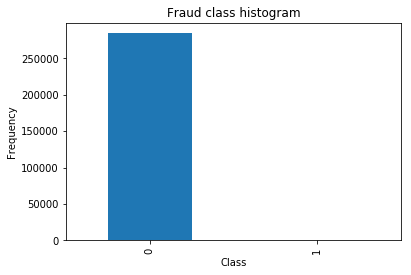

In [80]:
# 查看类别数量

count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

### 显然正负样本不均衡，可以通过上、下采样调整样本分布均匀。
    - 上采样：是对少的样本（此例中是类别为 1 的样本）再多生成些，使类别为 1 的样本和 0 的样本一样多。
    - 下采样：是指随机选取类别为 0 的样本，使类别为 0 的样本和类别为 1 的样本一样少

In [81]:
# 对Amount列进行标准化

from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))  # -1表示系统自动计算得到的行，1表示1列
data = data.drop(['Time','Amount'],axis=1)  # 删除两列。 Time 这一列与咱们的训练结果没有直接或间接关系，因此需要把这一列去掉
data.head()

D:\Anacondaaa\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [82]:
# 下采样

X = data.loc[:, data.columns != 'Class']  # loc:选取， 非Class列为数据
y = data.loc[:, data.columns == 'Class']  # Class列为标签

number_records_fraud = len(data[data.Class == 1])   # 统计异常值（标签为 1 ）的个数
#print (number_records_fraud)  # 492 个
fraud_indices = np.array(data[data.Class == 1].index)  # 统计欺诈样本的索引号，并变成矩阵的格式

normal_indices = data[data.Class == 0].index  # 记录正常值的索引

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)  # 从正常值的索引中，选择和异常值相等个数的样本
random_normal_indices = np.array(random_normal_indices)
#print (len(random_normal_indices))  #492 个

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])  # 将正负样本的索引进行组合
#print (under_sample_indices)   # 984个

under_sample_data = data.iloc[under_sample_indices,:]  # 按照索引进行取值

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']  #下采样后的训练集
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']  #下采样后的标签

# 正负样本的比例都是 0.5
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [83]:
# 训练集、测试集切分
# 对数据进行切分，既要对原始数据进行一定比例的切分，测试时能用到；又要对下采样后的样本进行切分，训练的时候用。而且，切分之前，每次都要进行洗牌

from sklearn.model_selection  import train_test_split

# 对整个数据进行划分 （random_state=0或不设置，每次划分的结果都会不一样）
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0) # 返回训练集、测试集、训练标签、测试标签

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# 对下采样后的数据进行划分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


- 上面我们可以看到我们制造的样本均衡的数据比较小，在做测试是测试集不足以代表样本的整体性，所以真正测试时还是用原来数据集的测试集比较符合原始数据的分布

#### 模型评估。利用k折交叉验证，选择较好的参数
    - K折就是将数据集切分成K小块，依次取其中一块作为测试集，其他快作为训练集，直至每一块都被用作测试集。最后计算k次求得的分类率的平均值，作为该模型或者假设函数的真实分类率
    
#### 先说一个召回率 Recall，这个recall 是需要依据问题本身的含义的，比如，本例中让预测异常值，假设有100个样本，95个正常，5个异常。实际中，对于异常值，预测出来4个，所以，精度就是 80%。也就是说，我需要召回 5 个，实际召回 4 个。

- 引入四个小定义：TP、TN、FP、FN。

    TP,即 True Positive ，判断成了正例，判断正确；把正例判断为正例了

    TN,即 True negative, 判断成了负例，判断正确，这叫去伪；把负例判断为负例了

    FP，即False Positive ,判断成了正例，但是判断错了，也就是把负例判断为正例了

    FN ,即False negative ，判断成了负例，但是判断错了，也就是把正例判断为负例了

- 正则化惩罚项：为了提高模型的泛化能力（避免过拟合），加了诸如 L1 、L2正则化惩罚项


### ravel()扁平化
[[1 2 3]
 [4 5 6]
 [7 8 9]]
 扁平化后为：[1 2 3 4 5 6 7 8 9] 

In [84]:
#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [85]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False)  # 5折， shuffle：是否对数据洗牌

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]  # 惩罚力度参数

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score']) # 创建数据表(索引，列名)
 
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        
        #循环进行交叉验证
        
        '''
            fold.split(x_train_data): 将下采样后的数据集划分成5份
            enumerate：为每一份数据添加一个索引（从0开始）
            iteration：索引号
            indices: k折后的两个数组，indices[0]：训练集的索引； indices[1]：测试集的索引
        '''
        for iteration, indices in enumerate(fold.split(x_train_data)):  # enumerate: 添加索引

            # C：正则化系数。其越大，正则化越强 （改变权重）
            lr = LogisticRegression(C = c_param, penalty = 'l1')   # 实例化逻辑回归模型，L1 正则化，防止过拟合

            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())  #  训练模型, ravel():扁平化
            
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)  # 利用交叉验证进行预测

            # 计算召回率
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)  #评估预测结果，recall_score(真实情况，预测情况)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # 将平均召回率记录到创建的数据表中
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
        print(type(results_table['Mean recall score']))
        
    # idxmax(): 最大值对应的索引值
    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [86]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.9315068493150684
Iteration  1 : recall score =  0.9178082191780822
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  0.9594594594594594
Iteration  4 : recall score =  0.9545454545454546

Mean recall score  0.9526639964996129

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.8493150684931506
Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.9152542372881356
Iteration  3 : recall score =  0.9324324324324325
Iteration  4 : recall score =  0.8939393939393939

Mean recall score  0.89079096615665

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.8630136986301

D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondaaa\lib\site-pa

Iteration  0 : recall score =  0.863013698630137
Iteration  1 : recall score =  0.9041095890410958


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.9830508474576272


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.9459459459459459
Iteration  4 : recall score =  0.8939393939393939

Mean recall score  0.91801189500284

<class 'pandas.core.series.Series'>
*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.01
*********************************************************************************


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
# 绘制混淆矩阵

def plot_confusion_matrix(cm, classes, 
                          title='Confusion matrix',  
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    
    # product(a,b): 返回A、B中的元素的笛卡尔积的元组(0,0)(0,1)(1,0)(1,1)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],                                    # x坐标上的值，y坐标上的值，显示的内容
                 horizontalalignment="center",                      # 水平对齐方式
                 color="white" if cm[i, j] > thresh else "black")   # 文本颜色

    plt.tight_layout()  # 自动调整子图，使之填充整个画布
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

- itertools 是python的迭代器模块，itertools提供的工具相当高效且节省内存。
 使用这些工具，你将能够创建自己定制的迭代器用于高效率的循环。
- 混淆矩阵 https://baijiahao.baidu.com/s?id=1619821729031070174&wfr=spider&for=pc

Recall metric in the testing dataset:  0.9319727891156463


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


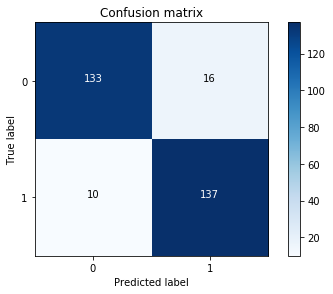

In [88]:
import itertools

# 使用下采样训练集，下采样测试集

lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# confusion_matrix: 混淆矩阵
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
# print(cnf_matrix)

np.set_printoptions(precision=2)  # 设置精度为小数点后2位

'''
在本例中：
    00位置上的数表示实际上是0，预测值为0的个数 （TN）；
    01位置上的数表示实际上是0，预测值为1的个数 （FT）；
    10位置上的数表示实际上是1，预测值为0的个数 （FN）；
    11位置上的数表示实际上是1，预测值为1的个数 （TP），
'''

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=class_names, 
                      title='Confusion matrix')
plt.show()

D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.9183673469387755


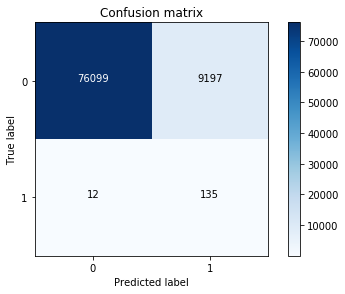

In [89]:
# 使用下采样训练集，原测试集

lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [90]:
# 使用原训练集，原测试集

best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.4925373134328358


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.6027397260273972


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.6833333333333333


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.5692307692307692


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.45

Mean recall score  0.5595682284048672

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  0.1
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.5671641791044776


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.6164383561643836


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.6833333333333333


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.5846153846153846


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.525

Mean recall score  0.5953102506435158

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  1
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.5522388059701493


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.6164383561643836


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.7166666666666667


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.6153846153846154


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.5625

Mean recall score  0.612645688837163

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  10
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.5522388059701493


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.6164383561643836


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.7333333333333333


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.6153846153846154


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.575

Mean recall score  0.6184790221704963

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  100
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.5522388059701493


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.6164383561643836


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.7333333333333333


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.6153846153846154


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.575

Mean recall score  0.6184790221704963

<class 'pandas.core.series.Series'>
*********************************************************************************
Best model to choose from cross validation is with C parameter =  10.0
*********************************************************************************


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.6190476190476191


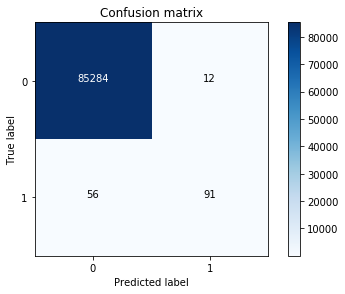

In [91]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

- 在此案例中我们把正常的样本预测成异常的出现10000多个（使用下采样训练集，原测试集），显然是不合适的，看来下采样方法效果也不是很好，那么我们接下来调整逻辑回归的阈值来看下阈值
- 阈值：概率大于阈值的属于1分类，概率小于阈值的属于0分类 https://www.cnblogs.com/mantch/p/10162418.html

D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9727891156462585
Recall metric in the testing dataset:  0.9319727891156463
Recall metric in the testing dataset:  0.8639455782312925
Recall metric in the testing dataset:  0.8231292517006803
Recall metric in the testing dataset:  0.7551020408163265
Recall metric in the testing dataset:  0.5782312925170068


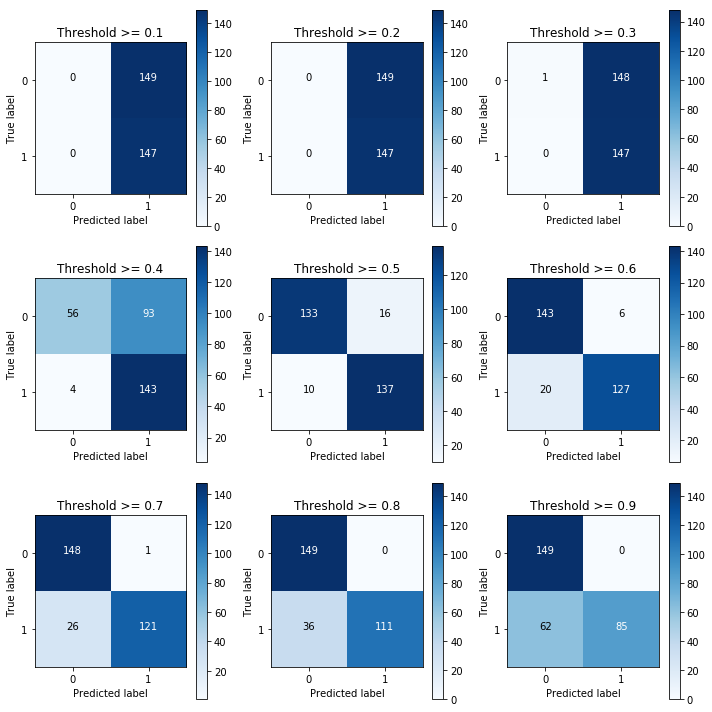

In [92]:
# 原来是预测类别值，而此处是预测概率。方便后续比较

lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())

# lr.predict_proba()返回的是一个n行（样本数量）2列（两个标签）的数组，
# 第i行第j列上的数值是模型预测第i个样本,标签为j的概率。所以每一行的和应该等于1
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)  # 预测概率

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 调整逻辑回归的阈值来看下阈值

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i  # 取预测为1的概率
    
    plt.subplot(3,3,j)
    j += 1
    
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'% i) 

- 从这里看，通过调整逻辑回归的阈值，召回率大小还是有一定的浮动的

 ### 换种思路，采用上采样，进行数据增广

In [93]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE  # imblearn：样本不平衡包
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [94]:
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns

# 删除标签列（即最后一列），获得特征列
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['Class']

print(Counter(labels))

Counter({0: 284315, 1: 492})


In [95]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [96]:
# SMOTE()：对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集
# 算法原理：https://blog.csdn.net/Scc_hy/article/details/84190080
oversampler=SMOTE(random_state=0)  # 默认生成一比一的数据
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [97]:
print(Counter(os_labels))

Counter({0: 227454, 1: 227454})


In [98]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

-------------------------------------------
C parameter:  0.01
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.8903225806451613


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.8947368421052632


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.9688392165541662


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.9578923071850166


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.9582440289730823

Mean recall score  0.9340069950925379

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  0.1
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.8903225806451613


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.8947368421052632


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.9704769281841319


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.9592772117255252


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.9605631945131401

Mean recall score  0.9350753514346444

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  1
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.8903225806451613


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.8947368421052632


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.9697465973221202


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.9602664292544597


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.9607720293248041

Mean recall score  0.9351688957303617

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  10
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.8903225806451613


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.8947368421052632


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.970366271992918


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.9601235422780581


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.9586287246787791

Mean recall score  0.934835592340036

<class 'pandas.core.series.Series'>
-------------------------------------------
C parameter:  100
-------------------------------------------



D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  0 : recall score =  0.8903225806451613


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.8947368421052632


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.9698793847515769


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.9603763423132302


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.9608050032424352

Mean recall score  0.9352240306115334

<class 'pandas.core.series.Series'>
*********************************************************************************
Best model to choose from cross validation is with C parameter =  100.0
*********************************************************************************


D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.900990099009901


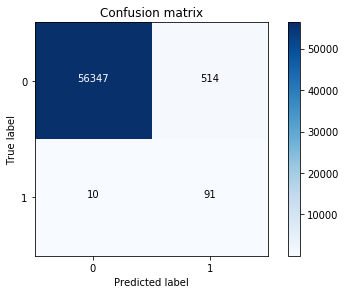

In [99]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()